In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [74]:
db = pd.read_csv('db_files/db_cleaned.csv')

In [75]:
db.shape

(558172, 21)

In [76]:
db.head(20)

,Unnamed: 0,tconst,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,...,ordering,pnconst,pcategory,region,types,nconst,primaryName,birthYear,deathYear,primaryProfession
0,34803,tt0035423,Kate & Leopold,Kate & Leopold,0,2001,2001,118,"Comedy,Fantasy,Romance",6.4,...,10,nm0107463,editor,IT,imdbDisplay,nm0179321,Noreen Corcoran,1943,2016,"actress,soundtrack"
1,34803,tt0035423,Kate & Leopold,Kate & Leopold,0,2001,2001,118,"Comedy,Fantasy,Romance",6.4,...,10,nm0107463,editor,IT,imdbDisplay,nm0228072,Françoise Diot,1914,2013,"editor,editorial_department,sound_department"
2,34803,tt0035423,Kate & Leopold,Kate & Leopold,0,2001,2001,118,"Comedy,Fantasy,Romance",6.4,...,10,nm0107463,editor,IT,imdbDisplay,nm0755977,Maksim Sagalovich,1915,1997,writer
3,34803,tt0035423,Kate & Leopold,Kate & Leopold,0,2001,2001,118,"Comedy,Fantasy,Romance",6.4,...,10,nm0107463,editor,IT,imdbDisplay,nm0790590,Haleigh Sheehan,1983,2024,actress
4,34803,tt0035423,Kate & Leopold,Kate & Leopold,0,2001,2001,118,"Comedy,Fantasy,Romance",6.4,...,10,nm0107463,editor,IT,imdbDisplay,nm0866390,Peter Tomarken,1942,2006,"actor,producer,writer"
5,34803,tt0035423,Kate & Leopold,Kate & Leopold,0,2001,2001,118,"Comedy,Fantasy,Romance",6.4,...,2,nm0413168,actor,EG,imdbDisplay,nm0179321,Noreen Corcoran,1943,2016,"actress,soundtrack"
6,34803,tt0035423,Kate & Leopold,Kate & Leopold,0,2001,2001,118,"Comedy,Fantasy,Romance",6.4,...,2,nm0413168,actor,EG,imdbDisplay,nm0228072,Françoise Diot,1914,2013,"editor,editorial_department,sound_department"
7,34803,tt0035423,Kate & Leopold,Kate & Leopold,0,2001,2001,118,"Comedy,Fantasy,Romance",6.4,...,2,nm0413168,actor,EG,imdbDisplay,nm0755977,Maksim Sagalovich,1915,1997,writer
8,34803,tt0035423,Kate & Leopold,Kate & Leopold,0,2001,2001,118,"Comedy,Fantasy,Romance",6.4,...,2,nm0413168,actor,EG,imdbDisplay,nm0790590,Haleigh Sheehan,1983,2024,actress
9,34803,tt0035423,Kate & Leopold,Kate & Leopold,0,2001,2001,118,"Comedy,Fantasy,Romance",6.4,...,2,nm0413168,actor,EG,imdbDisplay,nm0866390,Peter Tomarken,1942,2006,"actor,producer,writer"


# FAVOURITE GENRE PER DECADE

In [84]:
db2 = pd.read_csv('db_files/movies_db_cleaned.csv')
db2 = db2[db2.startYear <= 2020 ]

In [85]:
Comedy_db = db2.groupby(['startYear'])['genres'].apply(lambda x: x[x.str.contains('Comedy')].count())
Drama_db = db2.groupby(['startYear'])['genres'].apply(lambda x: x[x.str.contains('Drama')].count())
Action_db = db2.groupby(['startYear'])['genres'].apply(lambda x: x[x.str.contains('Action')].count())
Scifi_db = db2.groupby(['startYear'])['genres'].apply(lambda x: x[x.str.contains('Sci-Fi')].count())
Horror_db = db2.groupby(['startYear'])['genres'].apply(lambda x: x[x.str.contains('Horror')].count())
Western_db = db2.groupby(['startYear'])['genres'].apply(lambda x: x[x.str.contains('Western')].count())
Romance_db = db2.groupby(['startYear'])['genres'].apply(lambda x: x[x.str.contains('Romance')].count())
Thriller_db = db2.groupby(['startYear'])['genres'].apply(lambda x: x[x.str.contains('Thriller')].count())
Musical_db = db2.groupby(['startYear'])['genres'].apply(lambda x: x[x.str.contains('Musical')].count())

Text(0.5, 1.0, 'Musical')

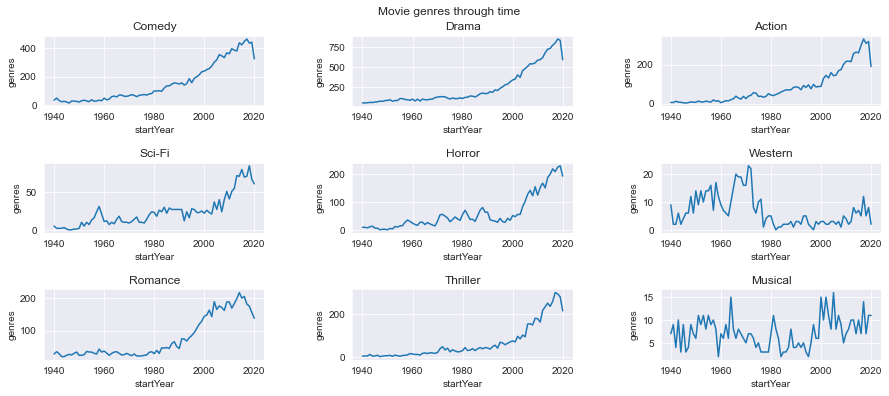

In [86]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.pyplot.subplots(3, 3, figsize=(15, 5))
fig.suptitle('Movie genres through time')
plt.pyplot.subplots_adjust(left=0.125, bottom=0, right=0.9, top=0.9, wspace=0.4, hspace=0.8)

sns.lineplot(ax=ax1,data=Comedy_db);
ax1.set_title('Comedy')
sns.lineplot(ax=ax2,data=Drama_db);
ax2.set_title('Drama')
sns.lineplot(ax=ax3,data=Action_db);
ax3.set_title('Action')
sns.lineplot(ax=ax4,data=Scifi_db);
ax4.set_title('Sci-Fi')
sns.lineplot(ax=ax5,data=Horror_db);
ax5.set_title('Horror')
sns.lineplot(ax=ax6,data=Western_db);
ax6.set_title('Western')
sns.lineplot(ax=ax7,data=Romance_db);
ax7.set_title('Romance')
sns.lineplot(ax=ax8,data=Thriller_db);
ax8.set_title('Thriller')
sns.lineplot(ax=ax9,data=Musical_db);
ax9.set_title('Musical')

As we can see most genres increase over time. This is because there are more films being made nowadays. Nevertheless, some genres have remained equally popular over time, like musicals. Even more, some genres were more popular in the past like Westerns.

# RATINGS THROUGH TIME

<AxesSubplot:xlabel='startYear', ylabel='averageRating'>

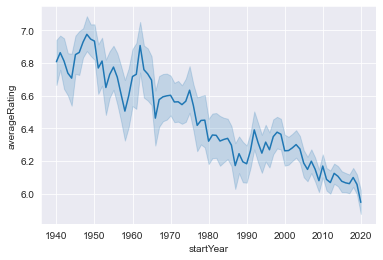

In [87]:
sns.lineplot(data=db2,x='startYear',y='averageRating')